In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [6]:
# Stating the problem's exogenous parameters (number of hours in a day, number of shift types, demand for couriers)
num_hours = 11
num_shift_types = 5
demand = np.random.randint(0, 26, 11)

In [7]:
# Demand for couriers
demand

array([ 0, 19, 16, 24, 14, 10, 23, 22, 23, 23, 14])

In [8]:
# Creating the decision variables and supplementary variables
N = cp.Variable(shape=(5, 11), integer=True)
ident_11 = np.ones((11, 1))
ident_5 = np.ones((5,))

#Formulating the objective function and necessary constraints
obj = cp.Minimize(ident_5 @ (N @ ident_11))
cons = [
    N>=0,
    cp.sum(N[:,0]) >= demand[0],
    cp.sum(N[:,0]) + cp.sum(N[:,1]) >= demand[1],
    cp.sum(N[:,0]) + cp.sum(N[:,1]) + cp.sum(N[:,2]) >= demand[2],
    cp.sum(N[:,0]) + cp.sum(N[:,1]) + cp.sum(N[:,2]) + cp.sum(N[:,3]) >= demand[3],
    cp.sum(N[1:,0]) + cp.sum(N[:,1]) + cp.sum(N[:,2]) + cp.sum(N[:,3]) + cp.sum(N[:3,4])>=demand[4],
    cp.sum(N[2:,0]) + cp.sum(N[1:,1]) + cp.sum(N[:,2]) + cp.sum(N[:,3]) + 
    cp.sum(N[:3,4]) + cp.sum(N[:2,5]) >= demand[5],
    cp.sum(N[3:,0]) + cp.sum(N[2:,1]) + cp.sum(N[1:,2]) + cp.sum(N[:,3]) + 
    cp.sum(N[:3,4]) + cp.sum(N[:2,5]) + cp.sum(N[:1, 6]) >= demand[6],
    N[4,1] + cp.sum(N[3:,2]) + cp.sum(N[2:,3]) + cp.sum(N[1:3,4]) + 
    cp.sum(N[:2,5]) + cp.sum(N[:1,6]) + N[0, 7] >= demand[7],
    N[4,1] + cp.sum(N[2:,2]) + cp.sum(N[1:,3]) + 
    cp.sum(N[:3,4]) + cp.sum(N[:2,5]) + cp.sum(N[:1, 6]) + N[0, 7] >= demand[8],
    N[4,2] + cp.sum(N[3:4, 3]) + cp.sum(N[2:3, 4]) + cp.sum(N[1:2, 5]) +
    cp.sum(N[0:1, 6]) + N[0,7] >= demand[9],
    N[4, 3] + N[3, 4] + N[1, 6] + N[0, 7] >= demand[10],
]
prob = cp.Problem(obj, cons)

#Solving the problem and acquiring results
prob.solve()
res = N.value
res

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 19.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

<BarContainer object of 11 artists>

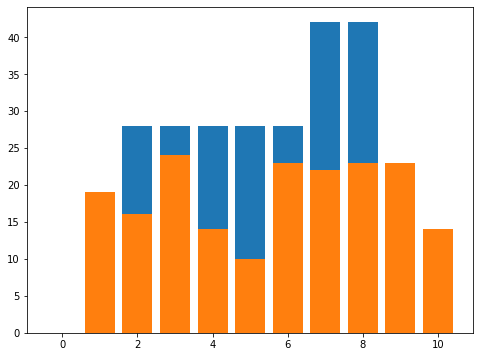

In [9]:
shifts = [np.sum(res[:,0]),
    np.sum(res[:,0]) + np.sum(res[:,1]),
    np.sum(res[:,0]) + np.sum(res[:,1]) + np.sum(res[:,2]),
    np.sum(res[:,0]) + np.sum(res[:,1]) + np.sum(res[:,2]) + np.sum(res[:,3]),
    np.sum(res[1:,0]) + np.sum(res[:,1]) + np.sum(res[:,2]) + np.sum(res[:,3]) + np.sum(res[:3,4]),
    np.sum(res[2:,0]) + np.sum(res[1:,1]) + np.sum(res[:,2]) + np.sum(res[:,3]) + 
    np.sum(res[:3,4]) + np.sum(res[:2,5]),
    np.sum(res[3:,0]) + np.sum(res[2:,1]) + np.sum(res[1:,2]) + np.sum(res[:,3]) + 
    np.sum(res[:3,4]) + np.sum(res[:2,5]) + np.sum(res[:1, 6]),
    res[4,1] + np.sum(res[3:,2]) + np.sum(res[2:,3]) + np.sum(res[1:3,4]) + 
    np.sum(res[:2,5]) + np.sum(res[:1,6]) + res[0, 7],
    res[4,1] + np.sum(res[2:,2]) + np.sum(res[1:,3]) + 
    np.sum(res[:3,4]) + np.sum(res[:2,5]) + np.sum(res[:1, 6]) + res[0, 7],
    res[4,2] + np.sum(res[3:4, 3]) + np.sum(res[2:3, 4]) + np.sum(res[1:2, 5]) +
    np.sum(res[0:1, 6]) + res[0,7],
    res[4, 3] + res[3, 4] + res[1, 6] + res[0, 7]]

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.bar(list(range(0, 11)), shifts)
ax.bar(list(range(0, 11)), demand)